In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mticker

import initialise
import common

In [2]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

In [3]:
samples_file_australia = os.path.join(common.DATASETS_DIR, 'australia_samples_365days.csv')
samples_file_conus = os.path.join(common.DATASETS_DIR, 'samples_365days.csv')
samples_file_europe = os.path.join(common.DATASETS_DIR, 'europe_samples_365days.csv')
australia_samples = pd.read_csv(samples_file_australia, index_col=0)
conus_samples = pd.read_csv(samples_file_conus, index_col=0)
europe_samples = pd.read_csv(samples_file_europe, index_col=0)
output_dir = common.FIGURES_DIR

In [4]:
australia_sites = australia_samples[['Site', 'Czone2', 'Czone3', 'LC Category', 'Land Cover']].drop_duplicates().set_index('Site')
conus_sites = conus_samples[['Site', 'Czone2', 'Czone3', 'LC Category', 'Land Cover']].drop_duplicates().set_index('Site')
europe_sites = europe_samples[['Site', 'Czone2', 'Czone3', 'LC Category', 'Land Cover']].drop_duplicates().set_index('Site')

In [5]:
rs = np.random.RandomState(345) #987 #345 #7654 #9876

sample_sites = pd.concat([
    australia_sites[(australia_sites['Czone2'] == 'Cf') & (australia_sites['LC Category'] == 'Agriculture')].sample(1, random_state=rs),
    conus_sites[(conus_sites['Czone2'] == 'Cf') & (conus_sites['LC Category'] == 'Agriculture')].sample(1, random_state=rs),
    europe_sites[(europe_sites['Czone2'] == 'Cf') & (europe_sites['LC Category'] == 'Agriculture')].sample(1, random_state=rs),

    australia_sites[(australia_sites['Czone3'] == 'Csb') & (australia_sites['LC Category'] == 'Forest')].sample(1, random_state=rs),
    conus_sites[(conus_sites['Czone3'] == 'Csb') & (conus_sites['LC Category'] == 'Forest')].sample(1, random_state=rs),
    europe_sites[(europe_sites['Czone3'] == 'Csb') & (europe_sites['LC Category'] == 'Forest')].sample(1, random_state=rs),

    australia_sites[(australia_sites['Czone3'] == 'BSk') & (australia_sites['LC Category'] == 'Grassland')].sample(1, random_state=rs),
    conus_sites[(conus_sites['Czone3'] == 'BSk') & (conus_sites['LC Category'] == 'Grassland')].sample(1, random_state=rs),
    europe_sites[(europe_sites['Czone3'] == 'BSk') & (europe_sites['LC Category'] == 'Grassland')].sample(1, random_state=rs),

    australia_sites[(australia_sites['Czone2'] == 'BS') & (australia_sites['LC Category'] == 'Shrubland')].sample(1, random_state=rs),
    conus_sites[(conus_sites['Czone2'] == 'BS') & (conus_sites['LC Category'] == 'Shrubland')].sample(1, random_state=rs),
    europe_sites[(europe_sites['Czone2'] == 'BS') & (europe_sites['LC Category'] == 'Shrubland')].sample(1, random_state=rs),

], keys=['Australia', 'CONUS', 'Europe'] * 4)

sample_sites = sample_sites.reset_index(0)
sample_sites

,level_0,Czone2,Czone3,LC Category,Land Cover
Site,,,,,
C10_20,Australia,Cf,Cfb,Agriculture,"Cropland, rainfed"
C6_146,CONUS,Cf,Cfa,Agriculture,"Cropland, rainfed"
C2_60,Europe,Cf,Cfb,Agriculture,"Cropland, rainfed"
C11_13,Australia,Cs,Csb,Forest,"Tree cover, broadleaved, evergreen, closed to ..."
C6_874,CONUS,Cs,Csb,Forest,"Tree cover, needleleaved, evergreen, closed to..."
C2_57,Europe,Cs,Csb,Forest,"Tree cover, needleleaved, evergreen, closed to..."
C10_15,Australia,BS,BSk,Grassland,Herbaceous cover
C6_688,CONUS,BS,BSk,Grassland,Grassland
C8_1,Europe,BS,BSk,Grassland,Herbaceous cover


In [6]:
era5_dir = r'G:\My Drive\LFMC Data\GEE_SR-ORG-6974_463\ERA5'
era5_csv = {}
for site in sample_sites.index: #reset_index().Site:
    f = f'{site}.csv'
    era5_csv[site] = pd.read_csv(os.path.join(era5_dir, f), index_col=0, parse_dates=True)

In [7]:
era5_csv['C10_20']

,pre_tot,temp_mean,temp_min,temp_max,dewpt_mean,pet_min,pet_max
id,,,,,,,
2000-03-01,6.476045e-05,292.785112,286.098434,298.759003,285.877295,-0.000892,4.366040e-06
2000-03-02,3.042817e-06,294.436682,286.479034,302.231979,285.595830,-0.001132,5.252659e-06
2000-03-03,3.215879e-04,296.396928,290.786987,304.054504,287.305343,-0.001214,-1.117587e-07
2000-03-04,4.257560e-04,289.572776,286.239899,294.259827,286.046968,-0.000567,-1.113117e-05
2000-03-05,1.282471e-03,292.318683,287.379135,299.256271,285.043791,-0.001050,9.536743e-07
...,...,...,...,...,...,...,...
2018-12-27,8.612870e-07,299.118117,291.827576,306.557983,283.714820,-0.001414,-9.246171e-06
2018-12-28,5.987322e-06,300.157263,292.210922,306.746811,284.659358,-0.001494,-8.143485e-06
2018-12-29,5.986769e-06,297.998917,290.762161,305.649673,286.075793,-0.001453,-1.713634e-07


In [26]:
bands = ['Precipitation', 'Mean temperature', 'Min temperature', 'Max temperature', 'Mean Dewpoint Temp', 'Surface pressure', 'Sea level pressure']
#NIR-1 = NIR-8?
#NIR-2 = NIR-12?
styles = ['-', '--', '-.', ':', ':', '-', '--']
set1 = matplotlib.colormaps['Set1']
colours1 = ListedColormap([set1.colors[i] for i in [0, 3, 1, 2]])
colours2 = ListedColormap([set1.colors[i] for i in [7, 4, 6]])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '']
month_ends = [0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 366]
fig_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

In [101]:
ylims = [y.get_ylim() for y in sec_ax_list]
ylims = [[y[0] for y in ylims], [y[1] for y in ylims]]
ylims = (min(ylims[0]), max(ylims[1]))

(-0.003957226872444135, 0.012372419238090434)

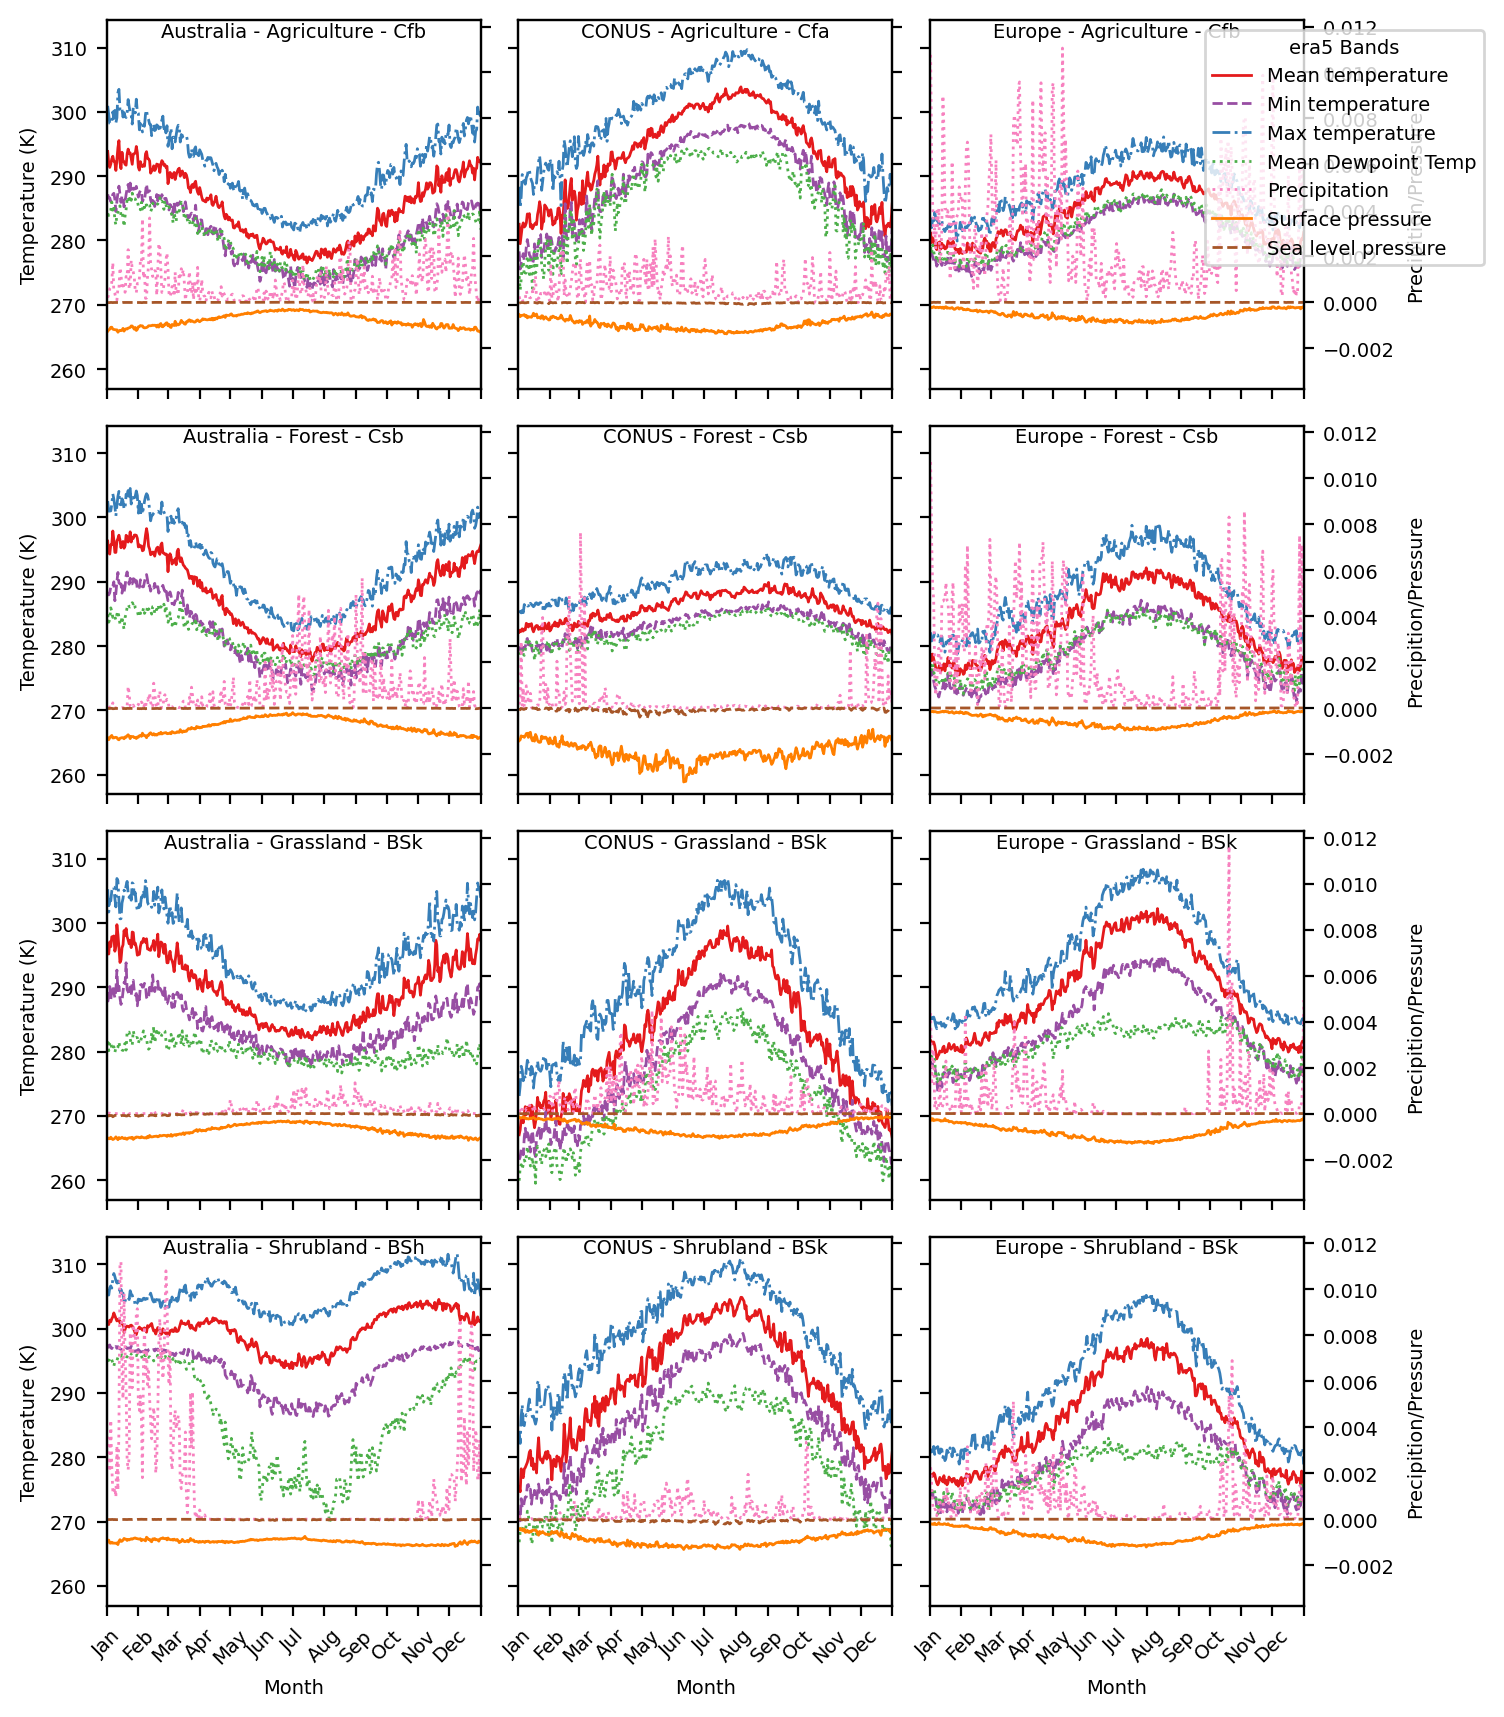

In [105]:
fig1, axes = plt.subplots(nrows=4, ncols=3, figsize=(7.927, 10.5), dpi=200, #layout='constrained',
                          gridspec_kw={'wspace': 0.1, 'hspace': 0.1}, sharex=True, sharey=True)
sec_ax_list = []
for n, (site, data) in enumerate(era5_csv.items()):
    ax = axes.flatten()[n]
    plot_df = data.groupby(data.index.dayofyear).median() 
    plot_df[['temp_mean', 'temp_min', 'temp_max', 'dewpt_mean']].plot(ax=ax, colormap=colours1, style=styles, lw=1)
    sec_ax = plot_df[['pre_tot', 'pet_min', 'pet_max']].plot(ax=ax, secondary_y=True, colormap=colours2, style=styles[4:], lw=1)
    sec_ax_list.append(sec_ax)
    title = f"{sample_sites.loc[site, 'level_0']} - {sample_sites.loc[site, 'LC Category']} - {sample_sites.loc[site, 'Czone3']}"
    ax.set_title(title, y=0.91)
    if n == 0:
        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = sec_ax.get_legend_handles_labels()
        h = h1 + h2
        l = l1 + l2
    ax.legend().remove()
    ax.tick_params(axis='x', which='minor', top=False, bottom=False)
    # ticks_loc = ax.get_xticks().tolist()
    # ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticks(month_ends)
    ax.set_xticklabels(months, rotation=45)
    ax.set_xlim(0, 366)
    ax.set_xlabel('Month')
    ax.set_ylabel('Temperature (K)')
    # for axis in ['top', 'right']:
    #     ax.spines[axis].set_visible(False)
fig1.subplots_adjust(right=0.88)
plot_order = [1, 2, 3, 4, 0, 5, 6]
fig1.legend(handles=h, labels=[bands[idx] for idx in plot_order],
            ncol=1, loc='upper right', bbox_to_anchor=(0, 0, 1, 0.88), title='ERA5 Bands', title_fontsize=SMALL_SIZE)

ylims = [y.get_ylim() for y in sec_ax_list]
ylims = [[y[0] for y in ylims], [y[1] for y in ylims]]
ylims = (min(ylims[0]), max(ylims[1]))

for n, y in enumerate(sec_ax_list):
    y.set_ylim(ylims)
    if n in [2, 5, 8, 11]:
        y.set_ylabel('Precipition/Pressure')
    else:
        y.set_yticklabels([])

# fig1.savefig(os.path.join(output_dir, 'era5 dist.jpeg'), format="jpeg",
#                     bbox_inches='tight', pad_inches=0.05, dpi=500)

In [76]:
sec_ax_list[3].__dict__

{'_stale': True,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': <Axes: ylabel='Precipition/Pressure'>,
 'figure': <Figure size 1585.4x2100 with 24 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x205fbaddca0>,
 '_remove_method': <bound method FigureBase.delaxes of <Figure size 1585.4x2100 with 24 Axes>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_position': Bbox([[0.125, 0.5112790697674419], [0.3609375, 0.6868604651162791]]),
 '_originalPosition': Bbox([[0.125, 0.5112790697674419], [0.3609375, 0.6868604651162791]]),
 '_aspect': 'auto',
 '_adjustable': 'datalim',
 '_anch

In [77]:
axes.flatten()[2].__dict__

{'_stale': True,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': <Axes: title={'center': 'Europe - Agriculture - Cfb'}, xlabel='Month', ylabel='Temperature (K)'>,
 'figure': <Figure size 1585.4x2100 with 24 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x205fb564fa0>,
 '_remove_method': <bound method FigureBase.delaxes of <Figure size 1585.4x2100 with 24 Axes>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_position': Bbox([[0.6440625, 0.7044186046511628], [0.88, 0.88]]),
 '_originalPosition': Bbox([[0.6440625, 0.7044186046511628], [0.88, 0.88]]),
 '_aspect': 'auto',
 '_ad